# Storytelling Data Visualization on Exchange Rates during COVID-19 Pandemic
## Introduction
- In this project, we'll analyze the exchange rate between the euro and [other strong currencies](https://www.thetealmango.com/featured/strongest-currencies-in-the-world/): US Dollar/USD, British Pound/GBP, Swiss Franc/CHF and Australian Dollar/AUD. 
- In addition, we'll focus on the period of the COVID-19 pandemic (2020-2022) to discuss how these rates behave during this time. 
- Our goal is to visualize the impact of the pandemic, and possible devaluations and recoveries.


## Introducing the Data
- The dataset describes the euro daily exchange rates between 1999 and 2022, and its source is the European Central Bank. The data is frequently updated and we can be downloaded [here](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020). We will use one version downloaded on January 2022.

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
import seaborn as sns

In [2]:
# importing the dataset
exchange_rates = pd.read_csv('euro-daily-hist_1999_2022.csv')

In [3]:
# Knowing the dataset
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2022-01-10,1.5774,1.9558,6.3969,1.4327,1.0446,7.2128,NaN,24.357,7.4381,...,4.9449,84.9825,10.3038,1.5344,NaN,NaN,38.0740,15.7183,1.1318,17.6999
1,2022-01-07,1.5804,1.9558,6.4343,1.4374,1.0422,7.2060,NaN,24.439,7.4380,...,4.9451,85.2980,10.2839,1.5356,NaN,NaN,38.0740,15.7206,1.1298,17.6701
2,2022-01-06,1.5778,1.9558,6.4420,1.4451,1.0395,7.2187,NaN,24.528,7.4393,...,4.9435,86.5088,10.3265,1.5388,NaN,NaN,37.9620,15.5504,1.1315,17.7932
3,2022-01-05,1.5600,1.9558,6.4146,1.4399,1.0364,7.2087,NaN,24.581,7.4384,...,4.9460,85.7275,10.2545,1.5340,NaN,NaN,37.6070,15.2446,1.1319,17.9369
4,2022-01-04,1.5682,1.9558,6.4174,1.4382,1.0355,7.1924,NaN,24.745,7.4378,...,4.9481,84.9202,10.2808,1.5310,NaN,NaN,37.5820,15.1384,1.1279,18.1080


In [4]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5958 entries, 0 to 5957
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5958 non-null   object 
 1   [Australian dollar ]      5958 non-null   object 
 2   [Bulgarian lev ]          5556 non-null   object 
 3   [Brazilian real ]         5690 non-null   object 
 4   [Canadian dollar ]        5958 non-null   object 
 5   [Swiss franc ]            5958 non-null   object 
 6   [Chinese yuan renminbi ]  5690 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5958 non-null   object 
 9   [Danish krone ]           5958 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5958 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5958 non-null   object 
 14  [Croatia

## Cleaning the Data

In [5]:
# Changing columns names
exchange_rates.rename(columns = {'[US dollar ]': 'US_dollar', 'Period\\Unit:': 'Time', '[Australian dollar ]': 'AUS_dollar', '[Swiss franc ]': 'Swiss_franc', '[UK pound sterling ]': 'UK_pound'},
                     inplace = True)

In [6]:
# Changing Time column
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace = True)
exchange_rates.reset_index(drop = True, inplace = True)
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5958 entries, 0 to 5957
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Time                      5958 non-null   datetime64[ns]
 1   AUS_dollar                5958 non-null   object        
 2   [Bulgarian lev ]          5556 non-null   object        
 3   [Brazilian real ]         5690 non-null   object        
 4   [Canadian dollar ]        5958 non-null   object        
 5   Swiss_franc               5958 non-null   object        
 6   [Chinese yuan renminbi ]  5690 non-null   object        
 7   [Cypriot pound ]          2346 non-null   object        
 8   [Czech koruna ]           5958 non-null   object        
 9   [Danish krone ]           5958 non-null   object        
 10  [Estonian kroon ]         3130 non-null   object        
 11  UK_pound                  5958 non-null   object        
 12  [Greek drachma ]    

In [7]:
# Selecting the currencies
euro_to_USdollar=exchange_rates.copy()[["Time", "US_dollar"]]

euro_to_UKpound=exchange_rates.copy()[["Time", "UK_pound"]]

euro_to_AUSdollar=exchange_rates.copy()[["Time", "AUS_dollar"]]

euro_to_SwissF=exchange_rates.copy()[["Time", "Swiss_franc"]]

In [8]:
# Inspecting value_counts
euro_to_USdollar["US_dollar"].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.2143     6
          ..
1.3196     1
0.9009     1
1.3255     1
0.8917     1
1.1334     1
Name: US_dollar, Length: 3592, dtype: int64

In [9]:
# Excluding "-"
euro_to_USdollar=euro_to_USdollar[euro_to_USdollar["US_dollar"]!="-"]

In [10]:
# Transforming into float type
euro_to_USdollar.loc[:,"US_dollar"]=euro_to_USdollar.loc[:,"US_dollar"].astype(float)
euro_to_USdollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5896 entries, 0 to 5957
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5896 non-null   datetime64[ns]
 1   US_dollar  5896 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 138.2 KB


In [11]:
# Inspecting value_counts
euro_to_UKpound["UK_pound"].value_counts()

-          62
0.87750     7
0.67930     7
0.68880     7
0.90430     7
           ..
0.82215     1
0.82750     1
0.84535     1
0.83945     1
0.83593     1
Name: UK_pound, Length: 3609, dtype: int64

In [12]:
# Excluding "-"
euro_to_UKpound=euro_to_UKpound[euro_to_UKpound["UK_pound"]!="-"]

In [13]:
# Transforming into float type
euro_to_UKpound.loc[:,"UK_pound"]=euro_to_UKpound.loc[:,"UK_pound"].astype(float)
euro_to_UKpound.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5896 entries, 0 to 5957
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Time      5896 non-null   datetime64[ns]
 1   UK_pound  5896 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 138.2 KB


In [14]:
# Inspecting value_counts
euro_to_AUSdollar["AUS_dollar"].value_counts()

-         62
1.6242     8
1.5781     8
1.6194     7
1.5840     7
          ..
1.9587     1
1.9679     1
1.9624     1
1.9840     1
1.5600     1
Name: AUS_dollar, Length: 3535, dtype: int64

In [15]:
# Excluding "-"
euro_to_AUSdollar=euro_to_AUSdollar[euro_to_AUSdollar["AUS_dollar"]!="-"]

In [16]:
# Transforming into float type
euro_to_AUSdollar.loc[:,"AUS_dollar"]=euro_to_AUSdollar.loc[:,"AUS_dollar"].astype(float)
euro_to_AUSdollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5896 entries, 0 to 5957
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Time        5896 non-null   datetime64[ns]
 1   AUS_dollar  5896 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 138.2 KB


In [17]:
# Inspecting value_counts
euro_to_SwissF["Swiss_franc"].value_counts()

-         62
1.2010    45
1.2011    13
1.2009    13
1.2014    10
          ..
1.4511     1
1.4516     1
1.4527     1
1.4638     1
1.0395     1
Name: Swiss_franc, Length: 2980, dtype: int64

In [18]:
# Excluding "-"
euro_to_SwissF=euro_to_SwissF[euro_to_SwissF["Swiss_franc"]!="-"]

In [19]:
# Transforming into float type
euro_to_SwissF.loc[:,"Swiss_franc"]=euro_to_SwissF.loc[:,"Swiss_franc"].astype(float)
euro_to_SwissF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5896 entries, 0 to 5957
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Time         5896 non-null   datetime64[ns]
 1   Swiss_franc  5896 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 138.2 KB


## Exploratory Data Analysis (EDA)
- Many factors can [influence currency exchange rates](https://canamcurrencyexchange.com/9-factors-that-influence-currency-exchange-rates/), like inflation, interest rates and economic health. Some historical facts had a huge impact on several of these aspects and can modify the exchange rates, for example, the global financial crisis in 2008. 
- On this project, we want to analyse the COVID-19 pandemic impact, that started in 2020 and we are still facing this problem in 2022.
- To start visualizing our data, we'll look at the exchange rates between the Euro and the other currencies in the whole time period of the dataset (1999-2022) and the exchange rates in the pandemic period (2020-2022). Our graph of the pandemic period will start in 2019 to get a better observation of how it was the exchange rates right before the COVID-19.

### 1. Euro to US Dollar:

In [20]:
# Minimum value
euro_to_USdollar[euro_to_USdollar['US_dollar'] == euro_to_USdollar['US_dollar'].min()]

,Time,US_dollar
473,2000-10-26,0.8252


In [21]:
# Maximum value
euro_to_USdollar[euro_to_USdollar['US_dollar'] == euro_to_USdollar['US_dollar'].max()]

,Time,US_dollar
2486,2008-07-15,1.599


In [22]:
# Mean
euro_to_USdollar['US_dollar'].mean()

1.1988673677069202

In [23]:
# Using rolling mean (moving average) to smooth the graph line
euro_to_USdollar['rolling_mean'] = euro_to_USdollar['US_dollar'].rolling(30).mean()

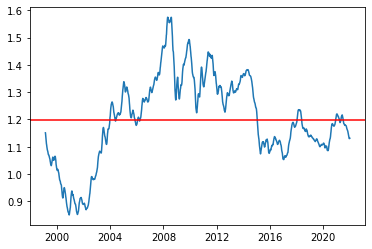

In [24]:
# Graph of the whole period
plt.plot(euro_to_USdollar['Time'], euro_to_USdollar['rolling_mean'])
plt.axhline(y=euro_to_USdollar['US_dollar'].mean(), color='red')
plt.show()

In [25]:
# Slicing the 2019-2022 period
euro_to_USdollar_19=euro_to_USdollar.copy()[euro_to_USdollar['Time'].dt.year >= 2019]

In [26]:
# Minimum value
euro_to_USdollar_19[euro_to_USdollar_19['US_dollar'] == euro_to_USdollar_19['US_dollar'].min()]

,Time,US_dollar,rolling_mean
5493,2020-03-20,1.0707,1.09995


In [27]:
# Maximum value
euro_to_USdollar_19[euro_to_USdollar_19['US_dollar'] == euro_to_USdollar_19['US_dollar'].max()]

,Time,US_dollar,rolling_mean
5696,2021-01-06,1.2338,1.213987


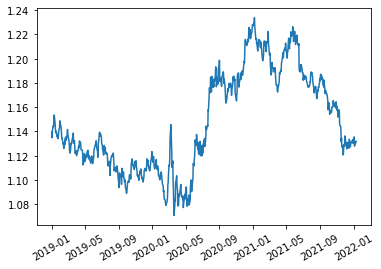

In [28]:
# Graph of the 2019-2022 period
plt.plot(euro_to_USdollar_19['Time'],  euro_to_USdollar_19['US_dollar'])
plt.xticks(rotation=30)
plt.show()

- Looking the first ghaph, we can observe the varations during the whole time period. We can see that from the end of 2003, the euro starts to cost more than one US dollar, and keeps this way until today.
- The Maximum value the Euro gets over the US dollar is 1.599 in July of 2008. And the Minimum value is 0.8252 in October of 2000. The range between both currencies is 0.7738.
- Comparing the both graphics, we can see that in the beginning of 2020 the exchange rate keeps decreasing (but since 2019 is decreasing) and it reaches the minimum value for this period (2019-2022) in March of 2020, with the value of 1.0707. It keeps rising until January of 2021, with the value of 1.2338.
- Despite the pandemic, the exchange rate is still above 1 and it's not far from the mean (1.1988), the range in this period was 0.1631.

### 2. Euro to UK Pound

In [29]:
# Minimum value
euro_to_UKpound[euro_to_UKpound['UK_pound'] == euro_to_UKpound['UK_pound'].min()]

,Time,UK_pound
347,2000-05-03,0.5711


In [30]:
# Maximum value
euro_to_UKpound[euro_to_UKpound['UK_pound'] == euro_to_UKpound['UK_pound'].max()]

,Time,UK_pound
2605,2008-12-29,0.97855


In [31]:
# Mean
euro_to_UKpound['UK_pound'].mean()

0.7719652798507461

In [32]:
# Using rolling mean (moving average) to smooth the graph line
euro_to_UKpound['rolling_mean'] = euro_to_UKpound['UK_pound'].rolling(30).mean()

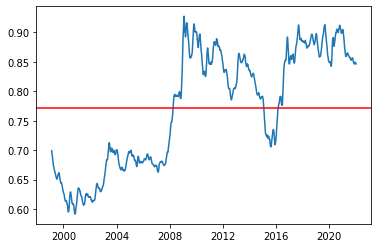

In [33]:
# Graph of the whole period
plt.plot(euro_to_UKpound['Time'], euro_to_UKpound['rolling_mean'])
plt.axhline(y=euro_to_UKpound['UK_pound'].mean(), color='red')
plt.show()

In [34]:
# Slicing the 2019-2022 period
euro_to_UKpound_19=euro_to_UKpound.copy()[euro_to_UKpound['Time'].dt.year >= 2019]

In [35]:
# Minimum value
euro_to_UKpound_19[euro_to_UKpound_19['UK_pound'] == euro_to_UKpound_19['UK_pound'].min()]

,Time,UK_pound,rolling_mean
5470,2020-02-18,0.82985,0.845843


In [36]:
# Maximum value
euro_to_UKpound_19[euro_to_UKpound_19['UK_pound'] == euro_to_UKpound_19['UK_pound'].max()]

,Time,UK_pound,rolling_mean
5492,2020-03-19,0.92985,0.861611


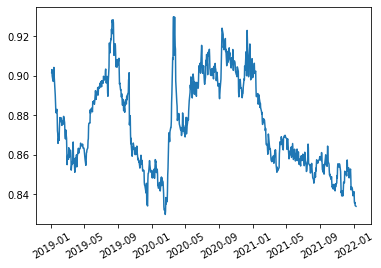

In [37]:
# Graph of the 2019-2022 period
plt.plot(euro_to_UKpound_19['Time'],  euro_to_UKpound_19['UK_pound'])
plt.xticks(rotation=30)
plt.show()

- Looking the first ghaph, we can observe the varations during the whole time period. We can see that in the year of 2008, the euro rise and it keeps above the mean (0.7719), except in 2016.
- The Maximum value the Euro gets over the UK pound is 0.97855 in December of 2008. And the Minimum value is 0.5711 in May of 2000. The range between both currencies is 0.401.
- Comparing the both graphics, we can see that in the beginning of 2020 the exchange rate keeps the same pattern of 2019 and it reaches the minimum value for this period (2019-2022) in February of 2020, with the value of 0.82985. The maximum is reached just one month later, in March of 2020, with the value of 0.92985. 
- Despite the pandemic, the range between the maximum and the minimum value in this period is just 0.1.

### 3. Euro to Australian Dollar

In [38]:
# Minimum value
euro_to_AUSdollar[euro_to_AUSdollar['AUS_dollar'] == euro_to_AUSdollar['AUS_dollar'].min()]

,Time,AUS_dollar
3548,2012-08-09,1.1639


In [39]:
# Maximum value
euro_to_AUSdollar[euro_to_AUSdollar['AUS_dollar'] == euro_to_AUSdollar['AUS_dollar'].max()]

,Time,AUS_dollar
2598,2008-12-18,2.0735


In [40]:
# Mean
euro_to_AUSdollar['AUS_dollar'].mean()

1.5794035956580732

In [41]:
# Using rolling mean (moving average) to smooth the graph line
euro_to_AUSdollar['rolling_mean'] = euro_to_AUSdollar['AUS_dollar'].rolling(30).mean()

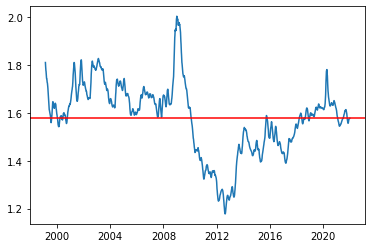

In [42]:
# Graph of the whole period
plt.plot(euro_to_AUSdollar['Time'], euro_to_AUSdollar['rolling_mean'])
plt.axhline(y=euro_to_AUSdollar['AUS_dollar'].mean(), color='red')
plt.show()

In [43]:
# Slicing the 2019-2022 period
euro_to_AUSdollar_19=euro_to_AUSdollar.copy()[euro_to_AUSdollar['Time'].dt.year >= 2019]

In [44]:
# Minimum value
euro_to_AUSdollar_19[euro_to_AUSdollar_19['AUS_dollar'] == euro_to_AUSdollar_19['AUS_dollar'].min()]

,Time,AUS_dollar,rolling_mean
5732,2021-02-25,1.5317,1.565337


In [45]:
# Maximum value
euro_to_AUSdollar_19[euro_to_AUSdollar_19['AUS_dollar'] == euro_to_AUSdollar_19['AUS_dollar'].max()]

,Time,AUS_dollar,rolling_mean
5492,2020-03-19,1.8635,1.691467


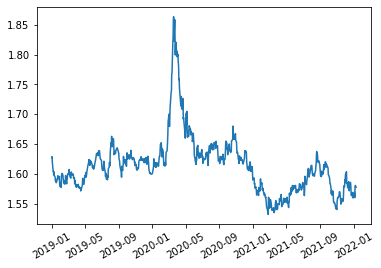

In [46]:
# Graph of the 2019-2022 period
plt.plot(euro_to_AUSdollar_19['Time'],  euro_to_AUSdollar_19['AUS_dollar'])
plt.xticks(rotation=30)
plt.show()

- Looking the first ghaph, we can observe the varations during the whole time period. We can see that from 1999 to 2010, the euro more than the average (1.5794), and keeps bellow until 2018.
- The Maximum value the Euro gets over the AUS dollar is 2.0735 in December of 2008. And the Minimum value is 1.1639 in August of 2012. The total range is 0.9096.
- Comparing the both graphics, we can see that in the beginning of 2020 the exchange rate reaches the maximum value (1.8632) in the month of March, but soon comes back to the range it was since 2019 (between 1.55 and 1.65). The minimum value for this period (2019-2022) occurs in February of 2020, with the value of 1.5317. 
- Despite the pandemic, the exchange rate keeps near the mean (1.5794), pattern since 2018. The range for this period is 0.3315.

### 4. Euro to Swiss Franc

In [47]:
# Minimum value
euro_to_SwissF[euro_to_SwissF['Swiss_franc'] == euro_to_SwissF['Swiss_franc'].min()]

,Time,Swiss_franc
4174,2015-01-23,0.9816


In [48]:
# Maximum value
euro_to_SwissF[euro_to_SwissF['Swiss_franc'] == euro_to_SwissF['Swiss_franc'].max()]

,Time,Swiss_franc
2289,2007-10-12,1.6803


In [49]:
# Mean
euro_to_SwissF['Swiss_franc'].mean()

1.3481505766621438

In [50]:
# Using rolling mean (moving average) to smooth the graph line
euro_to_SwissF['rolling_mean'] = euro_to_SwissF['Swiss_franc'].rolling(30).mean()

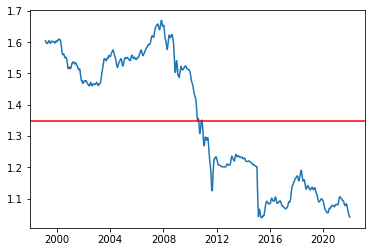

In [51]:
# Graph of the whole period
plt.plot(euro_to_SwissF['Time'], euro_to_SwissF['rolling_mean'])
plt.axhline(y=euro_to_SwissF['Swiss_franc'].mean(), color='red')
plt.show()

In [52]:
# Slicing the 2019-2022 period
euro_to_SwissF_19=euro_to_SwissF.copy()[euro_to_SwissF['Time'].dt.year >= 2019]

In [53]:
# Minimum value
euro_to_SwissF_19[euro_to_SwissF_19['Swiss_franc'] == euro_to_SwissF_19['Swiss_franc'].min()]

,Time,Swiss_franc,rolling_mean
5951,2021-12-31,1.0331,1.042043


In [54]:
# Maximum value
euro_to_SwissF_19[euro_to_SwissF_19['Swiss_franc'] == euro_to_SwissF_19['Swiss_franc'].max()]

,Time,Swiss_franc,rolling_mean
5259,2019-04-23,1.147,1.129477


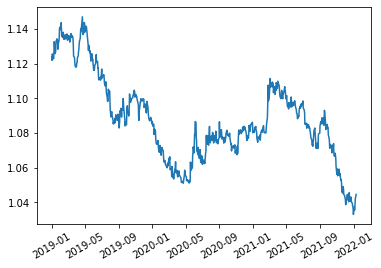

In [55]:
# Graph of the 2019-2022 period
plt.plot(euro_to_SwissF_19['Time'],  euro_to_SwissF_19['Swiss_franc'])
plt.xticks(rotation=30)
plt.show()

- Looking the first ghaph, we can that until 2011, the exchange rate is above the mean (1.3481). After reaching the maximum value in October of 2007 (1.6803), it decreased 0.6987 until the minimun value (0.9816), in January of 2015.
- Comparing the both graphics, we can see that in April of 2019 (before the pandemic) the exchange reaches its maximum value for the 2019-2022 period. The minimum value is 1.031, reached in December of 2021. 
- Despite the pandemic, the exchange rate is in the same range since 2015, and for the 2019-2022 period, the difference between the maximum and the minimum value is just 0.116.

## Data Visualization

In [56]:
style.use("fivethirtyeight")

In [57]:
#2016-2019:
euro_to_USdollar_16 = euro_to_USdollar.copy()[(euro_to_USdollar['Time'].dt.year >= 2016) & (euro_to_USdollar['Time'].dt.year <= 2019)]
euro_to_UKpound_16 = euro_to_UKpound.copy()[(euro_to_UKpound['Time'].dt.year >= 2016) & (euro_to_UKpound['Time'].dt.year <= 2019)]
euro_to_AUSdollar_16 = euro_to_AUSdollar.copy()[(euro_to_AUSdollar['Time'].dt.year >= 2016) & (euro_to_AUSdollar['Time'].dt.year <= 2019)]
euro_to_SwissF_16 = euro_to_SwissF.copy()[(euro_to_SwissF['Time'].dt.year >= 2016) & (euro_to_SwissF['Time'].dt.year <= 2019)]

#2020-2022:
euro_to_USdollar_20 =euro_to_USdollar.copy()[(euro_to_USdollar['Time'].dt.year >= 2020) & (euro_to_USdollar['Time'].dt.year <= 2022)]
euro_to_UKpound_20 =euro_to_UKpound.copy()[(euro_to_UKpound['Time'].dt.year >= 2020) & (euro_to_UKpound['Time'].dt.year <= 2022)]
euro_to_AUSdollar_20 =euro_to_AUSdollar.copy()[(euro_to_AUSdollar['Time'].dt.year >= 2020) & (euro_to_AUSdollar['Time'].dt.year <= 2022)]
euro_to_SwissF_20 =euro_to_SwissF.copy()[(euro_to_SwissF['Time'].dt.year >= 2020) & (euro_to_SwissF['Time'].dt.year <= 2022)]

Text(0.05, -0.03, '©Ana Luiza Miranda                                                                              Source: European Central Bank')

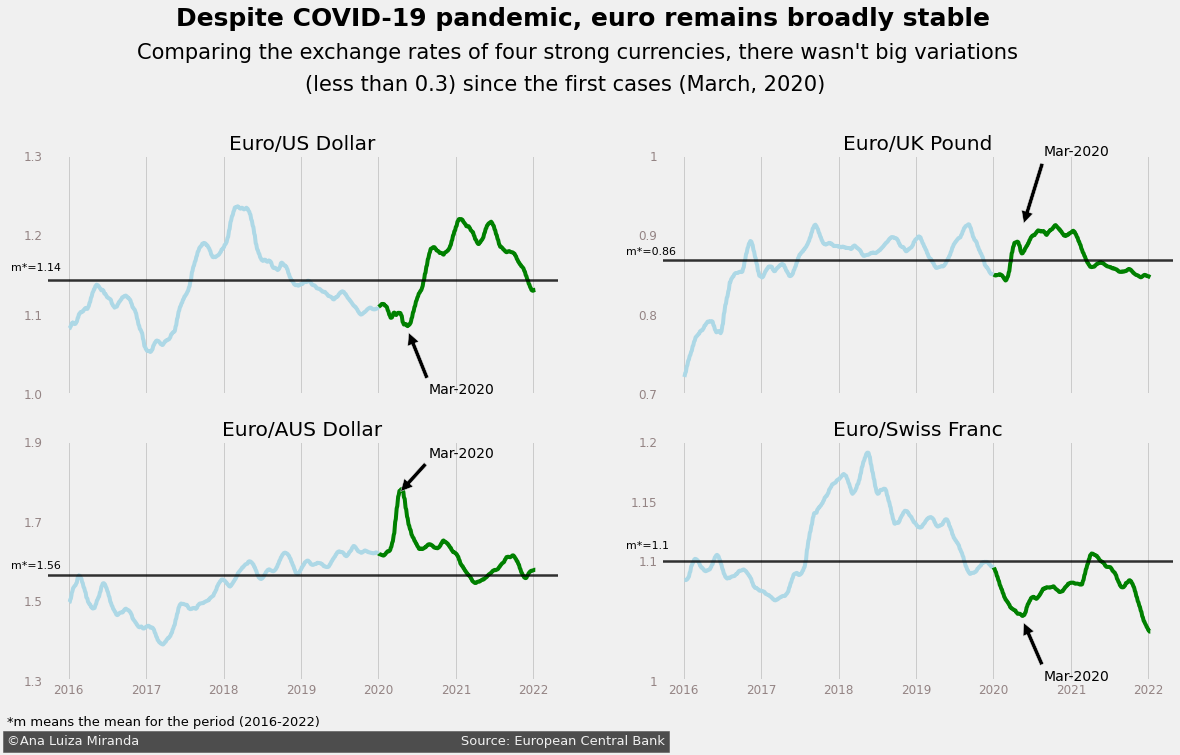

In [58]:
#Create the plot area and structure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
                                    ncols=2,
                                    nrows=2,
                                    figsize=(18, 9))

ax1.plot(euro_to_USdollar_16['Time'], euro_to_USdollar_16['rolling_mean'],color='lightblue')
ax1.plot(euro_to_USdollar_20['Time'], euro_to_USdollar_20['rolling_mean'],color='green' )
ax1.set_ylim(1, 1.3) 
ax1.set_yticks([1.0,1.1, 1.2,1.3])
ax1.set_yticklabels([1.0,1.1, 1.2,1.3])
ax1.tick_params(colors='#948484', which='both', labelsize=12)
ax1.set_xticklabels([])
ax1.yaxis.grid(False)
#ax1.set_yticklabels([])
ax1.axhline(1.1436,c="black", linewidth=2.5, alpha=0.8)
ax1.text(x=16530,y=1.155, s="m*=1.14", size=11)
ax1.annotate('Mar-2020', xy=(18400, 1.08), xytext=(18500, 1),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax1.title.set_text('Euro/US Dollar')

ax2.plot(euro_to_UKpound_16['Time'], euro_to_UKpound_16['rolling_mean'],color='lightblue')
ax2.plot(euro_to_UKpound_20['Time'], euro_to_UKpound_20['rolling_mean'],color='green' )
ax2.set_ylim(0.7, 1) 
ax2.set_yticks([0.7,0.8, 0.9, 1])
ax2.set_yticklabels([0.7,0.8, 0.9, 1])
ax2.tick_params(colors='#948484', which='both', labelsize=12)
ax2.set_xticklabels([])
ax2.yaxis.grid(False)
#ax2.set_yticklabels([])
ax2.axhline(0.8678,c="black", linewidth=2.5, alpha=0.8)
ax2.text(x=16530,y=0.875, s="m*=0.86", size=11)
ax2.annotate('Mar-2020', xy=(18400, 0.91), xytext=(18500, 1),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax2.title.set_text('Euro/UK Pound')

ax3.plot(euro_to_AUSdollar_16['Time'], euro_to_AUSdollar_16['rolling_mean'],color='lightblue')
ax3.plot(euro_to_AUSdollar_20['Time'], euro_to_AUSdollar_20['rolling_mean'],color='green' )
ax3.set_ylim(1.3, 1.9) 
ax3.set_yticks([1.3, 1.5, 1.7, 1.9])
ax3.set_yticklabels([1.3, 1.5, 1.7, 1.9])
ax3.tick_params(colors='#948484', which='both', labelsize=12)
ax3.yaxis.grid(False)
#ax3.set_yticklabels([])
ax3.axhline(1.5637,c="black", linewidth=2.5, alpha=0.8)
ax3.text(x=16530,y=1.58, s="m*=1.56", size=11)
ax3.annotate('Mar-2020', xy=(18360, 1.77), xytext=(18500, 1.86),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax3.title.set_text('Euro/AUS Dollar')

ax4.plot(euro_to_SwissF_16['Time'], euro_to_SwissF_16['rolling_mean'],color='lightblue')
ax4.plot(euro_to_SwissF_20['Time'], euro_to_SwissF_20['rolling_mean'],color='green' )
ax4.set_ylim(1, 1.2) 
ax4.set_yticks([1, 1.1, 1.15, 1.2])
ax4.set_yticklabels([1, 1.1, 1.15, 1.2])
ax4.tick_params(colors='#948484', which='both', labelsize=12)
ax4.yaxis.grid(False)
#ax4.set_yticklabels([])
ax4.axhline(1.1,c="black", linewidth=2.5, alpha=0.8)
ax4.text(x=16530,y=1.11, s="m*=1.1", size=11)
ax4.annotate('Mar-2020', xy=(18400, 1.05), xytext=(18500, 1),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax4.title.set_text('Euro/Swiss Franc')

#Title and subtitle:
fig.text(x=0.18,y=1.08,s="Despite COVID-19 pandemic, euro remains broadly stable",size=25, weight="bold")
fig.text(x=0.15,y=1.03,s="Comparing the exchange rates of four strong currencies, there wasn't big variations",size=21)
fig.text(x=0.28,y=0.98, s="(less than 0.3) since the first cases (March, 2020)",size=21)

#r description
fig.text(x=0.05,y=0, s="*m means the mean for the period (2016-2022)", size=13)

#Foot signature/source of graph:
fig.text(x=0.05, y=-0.03,s='©Ana Luiza Miranda' +' '*78 +"Source: European Central Bank", backgroundcolor="#4d4d4d", size=13,color="#f0f0f0")

## Conclusion
- In this Project, we used the Exchange rate data from the European Central Bank since 1999 until January of 2022.
- Our goal was analyse the impact of the COVID-19 in the Exchange rates of the Euro with other strong currencies (US Dollar, UK Pound, AUS Dollar and Swiss Franc). 
- In the Exploratory Data Analysis section, we analysed the Exchange rate in the whole period of time and in the COVID-19 period (2020-2022). We found that the range of the Exchange rate in this period was short (arround 0.1 for the US Dollar, UK Pound and Swiss Franc and arround 0.3 for the AUS Dollar). Comparing with other historical facts, like the financial crisis in 2008, the Euro was able to mantain a stability.
- In the Data Visualization section, we showed a graphic comparing the Exchange rates o four study with the Euro. We highlighted with Green the line of the COVID-19 period (2020-2022) and compared with the mean of the period of 2016-2022 (m*).
- For further informations, we recommend the lecture of [this article]( https://www.ecb.europa.eu/pub/ire/html/ecb.ire202106~a058f84c61.en.html#toc10) of the European Central Bank, showing why the international role of the Euro remained broadly stable at a low level over the review period (the article was published in June of 2021).

## Apendix
- Auxiliary calculations for the Data Visualization graph

In [59]:
euro_to_USdollar_g = euro_to_USdollar.copy()[(euro_to_USdollar['Time'].dt.year >= 2016) & (euro_to_USdollar['Time'].dt.year <= 2022)]
euro_to_USdollar_g['US_dollar'].mean()

1.1436370706416072

In [60]:
euro_to_UKpound_g = euro_to_UKpound.copy()[(euro_to_UKpound['Time'].dt.year >= 2016) & (euro_to_UKpound['Time'].dt.year <= 2022)]
euro_to_UKpound_g['UK_pound'].mean()

0.8678155865197669

In [61]:
euro_to_AUSdollar_g = euro_to_AUSdollar.copy()[(euro_to_AUSdollar['Time'].dt.year >= 2016) & (euro_to_AUSdollar['Time'].dt.year <= 2022)]
euro_to_AUSdollar_g['AUS_dollar'].mean()

1.5637204147764097

In [62]:
euro_to_SwissF_g = euro_to_SwissF.copy()[(euro_to_SwissF['Time'].dt.year >= 2016) & (euro_to_SwissF['Time'].dt.year <= 2022)]
euro_to_SwissF_g['Swiss_franc'].mean()

1.1031310434219055